# Joining Data

In [1]:
import pandas as pd                                                        
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid")
import seaborn as sns
import datetime as dt

### Cellphone data from HW3

In [2]:
dataprep = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/main/cell_phones_total.csv")

In [3]:
# dataprep.info()

In [4]:
# dataprep.isnull().sum()

In [5]:
cleaned_dataprep = dataprep.fillna(method='ffill', axis=1).fillna(0.0)

In [6]:
cleaned_dataprep.iloc[:, 1:] = cleaned_dataprep.iloc[:, 1:] \
    .replace({'k': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True) \
    .apply(pd.to_numeric, errors='coerce')

# cleaned_dataprep.info()

In [7]:
cleaned_dataprep[['iso-3','2015','2016', '2017', '2018', '2019']].sort_values('2015', ascending = False).head()

,iso-3,2015,2016,2017,2018,2019
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08


In [8]:
cleaned_data = cleaned_dataprep

In [9]:
#cleaned_data = pd.read_csv("/Users/alvinalindqvist/Documents/GitHub/su-mt4007/cleaned_cell_phones.csv") # cleaned_data from HW3
#cleaned_data.head()

### Population data

In [10]:
popdt = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/pop_data.csv")
popdt.head()

,Unnamed: 0,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0


#### Deal with missing values

In [11]:
# popdt.isnull().sum() # number of missing values for each column

In [12]:
# popdt.info() # overview of data

We can see that for the year 1960, 1961 and 1962 there are 2 missing values. We will start by replace the non values for 1960 with 0.0

In [13]:
#for year in popdt.columns[2:]:  # Starts from 1960
#    for row in range(len(popdt)):  # goes through every row
#        if pd.isnull(popdt.loc[row, year]):  
#            popdt.loc[row, year] = 0.0  # replace non values with 0.0
#popdt.head()

In [14]:
popdt.iloc[:, 2:] = popdt.iloc[:, 2:].fillna(0.0)

In [15]:
popdt.isnull().sum().sum() # see if any missing values exist

0

### Reshape the cellphone- and population data

We are going to use pd.melt(). to reshape the population dataset so that each row represents country, year, cellphones and population. After that we can apply the .merge() to combine them. 

In [16]:
reshaped_pop = popdt.melt(id_vars = 'iso-3', var_name = 'year', value_name = 'population')
reshaped_pop.head()

,iso-3,year,population
0,ABW,Unnamed: 0,0.0
1,AFE,Unnamed: 0,1.0
2,AFG,Unnamed: 0,2.0
3,AFW,Unnamed: 0,3.0
4,AGO,Unnamed: 0,4.0


In [17]:
reshaped_cell = cleaned_data.melt(id_vars = 'iso-3', var_name = 'year', value_name = 'n_cellphones')
reshaped_cell.head()

,iso-3,year,n_cellphones
0,ABW,1960,0.0
1,AFG,1960,0.0
2,AGO,1960,0.0
3,ALB,1960,0.0
4,AND,1960,0.0


### Combine the cell phone data with the population data

We can now use the merge() command. 

In [18]:
cell_pop_df = reshaped_cell.merge(reshaped_pop, on = ['iso-3', 'year'], how = 'inner')
cell_pop_df.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,AFG,1960,0.0,8622466.0
2,AGO,1960,0.0,5357195.0
3,ALB,1960,0.0,1608800.0
4,AND,1960,0.0,9443.0


#### Country data

In [19]:
country_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/country_data.csv').rename(columns={'alpha-3':'iso-3'}) # rename coulmn name
country_df.head()

,name,alpha-2,iso-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


### Combine population-, cellphone- and country data

In [20]:
merged_df = cell_pop_df.merge(country_df, on = 'iso-3')
merged_df.head()

,iso-3,year,n_cellphones,population,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,ABW,1960,0.0,54608.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,ABW,1965,0.0,58782.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
2,ABW,1966,0.0,59291.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
3,ABW,1967,0.0,59522.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
4,ABW,1968,0.0,59471.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


### Calcualte the number of phones per capita

We calculathe this by n_cellphones/population_size.

In [21]:
merged_df['phones per capita'] = merged_df['n_cellphones']/merged_df['population'] # create a new colum for phones per capita
merged_df.head()

,iso-3,year,n_cellphones,population,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,phones per capita
0,ABW,1960,0.0,54608.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,0.0
1,ABW,1965,0.0,58782.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,0.0
2,ABW,1966,0.0,59291.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,0.0
3,ABW,1967,0.0,59522.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,0.0
4,ABW,1968,0.0,59471.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,0.0


In [22]:
top_cellphone_2019 = merged_df.pivot(columns='name', index='year', values = 'phones per capita') #creates table
top5_2019 = top_cellphone_2019.sort_values('2019', axis=1, ascending = False).tail(10).iloc[:, :5].reset_index() # Sort countries 'p.p.c' in 2019 in descending order and select top5
top5_2019.head(10)

name,year,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
0,2010,2.009700,1.964637,1.285109,1.960441,1.314470
1,2011,2.364261,2.163584,1.364399,2.029310,1.452408
2,2012,2.762687,2.293674,1.592620,1.448548,1.540152
3,2013,2.898678,2.368051,1.839612,1.288179,1.523085
4,2014,3.078619,2.351477,1.901323,1.344749,1.652820
5,2015,3.088231,2.290401,2.007424,1.956838,1.584260
6,2016,3.143510,2.398931,2.212521,1.987545,1.605459
7,2017,3.210102,2.488773,2.183431,2.019337,1.742433
8,2018,3.348741,2.670209,2.199084,2.008164,1.849900
9,2019,3.284849,2.863650,2.127739,1.997460,1.987196


### The highest growth rate of cell phones (per capita) in last 10 years

<AxesSubplot:xlabel='year', ylabel='Phones per capita'>

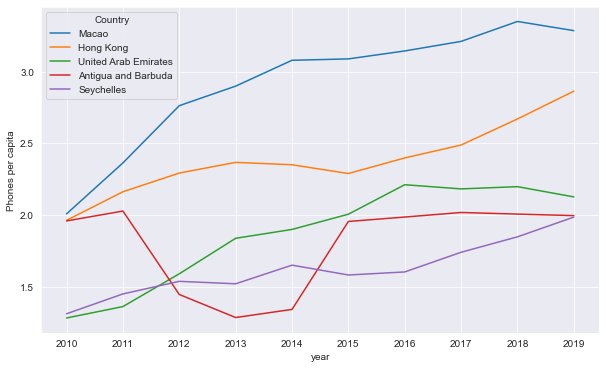

In [23]:
top_5 = top_cellphone_2019.sort_values('2019', axis=1, ascending = False).tail(10).iloc[:, :5].reset_index()
top_5_melted = top_5.melt(id_vars=['year'], var_name = 'Country', value_name = 'Phones per capita')

plt.figure(figsize=(10, 6)) 
sns.lineplot(data=top_5_melted, x = 'year', y = 'Phones per capita', hue = 'Country')

We can see that Macao has the fastest growth in cell phones per person over the last 10 years, with a steady increase. Hong Kong also grows steadily, while countries like the United Arab Emirates and Antigua and Barbuda grow more slowly. Seychelles has the smallest growth of all.

# SQL

In [24]:
import sqlite3 as sql

conn = sql.connect("/Users/alvinalindqvist/Desktop/user_actions.db")
cursor = conn.cursor()

list(cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")) # the tables we have. 

[('user_actions',)]

In [25]:
list(cursor.execute("SELECT * FROM PRAGMA_TABLE_INFO('user_actions');")) # the columns for the table user_actions

[(0, 'user_id', 'INTEGER', 0, None, 0),
 (1, 'username', 'TEXT', 0, None, 0),
 (2, 'email', 'TEXT', 0, None, 0),
 (3, 'action', 'TEXT', 0, None, 0),
 (4, 'timestamp', 'TEXT', 0, None, 0)]

In [26]:
list(cursor.execute("SELECT count(*) FROM user_actions;")) # number of rows in table user_actions

[(8040,)]

### Retrieve the usernames of all users who have performed the "signup" action.

In [27]:
query = """
SELECT
    username 
FROM
    user_actions
WHERE
    action='signup'
ORDER BY
    username;
"""
list(cursor.execute(query)) 

[('user1',),
 ('user10',),
 ('user11',),
 ('user12',),
 ('user13',),
 ('user14',),
 ('user15',),
 ('user16',),
 ('user17',),
 ('user18',),
 ('user19',),
 ('user2',),
 ('user20',),
 ('user21',),
 ('user22',),
 ('user23',),
 ('user24',),
 ('user25',),
 ('user26',),
 ('user27',),
 ('user28',),
 ('user29',),
 ('user3',),
 ('user30',),
 ('user31',),
 ('user32',),
 ('user33',),
 ('user34',),
 ('user35',),
 ('user4',),
 ('user5',),
 ('user6',),
 ('user7',),
 ('user8',),
 ('user9',)]

###  Find the total number of log entries for each user. Display the user_id, username, and the count of log entries.

In [28]:
query = """
SELECT
    user_id,
    username,
    COUNT(*) 
FROM
    user_actions
GROUP BY
    user_id
ORDER BY
    user_id;
"""
list(cursor.execute(query))

[(1, 'user1', 104),
 (2, 'user2', 149),
 (3, 'user3', 108),
 (4, 'user4', 436),
 (5, 'user5', 192),
 (6, 'user6', 457),
 (7, 'user7', 362),
 (8, 'user8', 329),
 (9, 'user9', 118),
 (10, 'user10', 170),
 (11, 'user11', 328),
 (12, 'user12', 209),
 (13, 'user13', 470),
 (14, 'user14', 320),
 (15, 'user15', 35),
 (16, 'user16', 379),
 (17, 'user17', 367),
 (18, 'user18', 122),
 (19, 'user19', 58),
 (20, 'user20', 362),
 (21, 'user21', 323),
 (22, 'user22', 275),
 (23, 'user23', 309),
 (24, 'user24', 162),
 (25, 'user25', 136),
 (26, 'user26', 217),
 (27, 'user27', 211),
 (28, 'user28', 91),
 (29, 'user29', 49),
 (30, 'user30', 165),
 (31, 'user31', 389),
 (32, 'user32', 32),
 (33, 'user33', 32),
 (34, 'user34', 180),
 (35, 'user35', 394)]

### Identify users who have both logged in (action = 'login') and signed up (action = 'signup') on the same day. Display the user_id and username.

In [29]:
query = """
SELECT
    ua1.user_id,
    ua1.username
FROM
    user_actions ua1
JOIN
    user_actions ua2 ON
    ua1.user_id = ua2.user_id AND 
    DATE(ua1.timestamp) = DATE(ua2.timestamp) AND 
    ua1.action = 'login' AND
    ua2.action = 'signup'
ORDER BY
    ua1.user_id
"""
list(cursor.execute(query))

[(2, 'user2'),
 (5, 'user5'),
 (5, 'user5'),
 (7, 'user7'),
 (8, 'user8'),
 (12, 'user12'),
 (22, 'user22'),
 (22, 'user22'),
 (30, 'user30'),
 (32, 'user32')]

In [30]:
cursor.close()
conn.close()

# Regex

In [31]:
comments = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/comments.txt')
comments.head()

,"1. ""Great post! #programming #tips"""
0,"2. ""Enjoyed the article. #coding #python"""
1,"3. ""Interesting insights. #tech #data"""
2,"4. ""This is awesome! #programming #coding"""
3,"5. ""Thanks for sharing. #data #analysis"""
4,"6. ""I learned a lot. #programming #python #tips"""


In [32]:
import requests

url = 'https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/comments.txt'
response = requests.get(url)
comments_lines = response.text.splitlines()
comments_lines[:10]

['1. "Great post! #programming #tips"',
 '2. "Enjoyed the article. #coding #python"',
 '3. "Interesting insights. #tech #data"',
 '4. "This is awesome! #programming #coding"',
 '5. "Thanks for sharing. #data #analysis"',
 '6. "I learned a lot. #programming #python #tips"',
 '7. "Cool stuff! #tech #innovation"',
 '8. "Amazing read. #coding #python"',
 '9. "Impressive content. #data #analytics"',
 '10. "Inspiring! #programming #tips"']

### Write a regular expression to extract all hashtags from a given comment. 

In [33]:
import re

def extract_hashtags(comment):
    return re.findall(r"#\w+", comment)

hashtags = [extract_hashtags(comment) for comment in comments_lines]
hashtags[:10] 

[['#programming', '#tips'],
 ['#coding', '#python'],
 ['#tech', '#data'],
 ['#programming', '#coding'],
 ['#data', '#analysis'],
 ['#programming', '#python', '#tips'],
 ['#tech', '#innovation'],
 ['#coding', '#python'],
 ['#data', '#analytics'],
 ['#programming', '#tips']]

### Create a regular expression to find comments that mention both "#programming" and "#python". Apply the regex to comment 2 and check if it matches.

In [34]:
def contains_programming_and_python(comment):
    return bool(re.search(r"#programming", comment) and re.search(r"#python", comment))

comments_with_both = [comment for comment in comments_lines if contains_programming_and_python(comment)]
comments_with_both

['6. "I learned a lot. #programming #python #tips"',
 '15. "Well explained. #programming #python #tips"',
 '21. "Love the content! #programming #python #tips"',
 '30. "Inspired by the tips. #programming #python #tips"']

### Using your regular expression, extract all unique hashtags from the entire text file.

In [35]:
all_hashtags = [tag for comment in comments_lines for tag in extract_hashtags(comment)]

unique_hashtags = set(all_hashtags)
unique_hashtags

{'#analysis',
 '#analytics',
 '#coding',
 '#data',
 '#innovation',
 '#insights',
 '#programming',
 '#python',
 '#research',
 '#tech',
 '#tips'}